In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fb_utils as fb

In [2]:
# set parameters

# signal length
N = 1024
# filter lengths
T_vals = 2**np.arange(3,11)
# number of filters
J = 10

In [3]:
plt.rcParams.update({
    'font.size': 10,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts,nicefrac,bm}'
})
plt.rcParams["font.family"] = "Times New Roman"

In [23]:
lmi_mean, lmi_std, lma_mean, lma_std, cond_mean, cond_std = fb.exp_fb(N, J, T_vals)
Y_min, Y_max = fb.chi_extreme(J, T_vals)

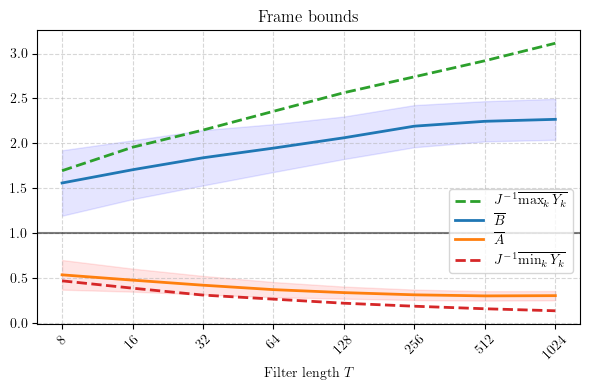

In [24]:
min_ci = 1.05 * np.array(lmi_std)
max_ci = 1.05 * np.array(lma_std)

mi_high = np.array(lmi_mean) + min_ci
mi_low = np.array(lmi_mean) - min_ci
ma_high = np.array(lma_mean) + max_ci
ma_low = np.array(lma_mean) - max_ci

x = np.arange(len(T_vals))

plt.figure(figsize=(6, 4))

# plt.plot(x, 1+2*np.sqrt(np.log2(T_vals)/J),':',color = 'tab:green',linewidth=2, label='$1+2\sqrt{\log{T} / J}$')
# plt.plot(x, 1-2*np.sqrt(np.log2(T_vals)/J),':',color = 'tab:red',linewidth=2, label='$1-2\sqrt{\log{T} / J}$')
plt.plot(x, Y_max/J,'--',color = 'tab:green',linewidth=2, label='$J^{-1} \overline{\max_k Y_k}$')

plt.plot(x, np.array(lma_mean), 'tab:blue', linewidth=2, label='$\overline{B}$')
plt.fill_between(x, ma_low, ma_high, color='b', alpha=.1)

plt.plot(x, np.array(lmi_mean), 'tab:orange', linewidth=2, label='$\overline{A}$')
plt.fill_between(x, mi_low, mi_high, color='r', alpha=.1)

plt.plot(x, Y_min/J,'--',color = 'tab:red',linewidth=2, label='$J^{-1} \overline{\min_k Y_k}$')

plt.axhline(y=1, color='k',linewidth=1.5, alpha=0.5)

plt.xticks(np.arange(len(T_vals)),T_vals, rotation=45);
plt.xlabel('Filter length $T$')
plt.title('Frame bounds')
plt.legend(bbox_to_anchor=(1, 0.15), loc = 'lower right')
plt.grid(linestyle='--', alpha=0.5)


plt.tight_layout()
plt.savefig('plots/frame_bounds.pdf', bbox_inches='tight')
plt.show()

In [52]:
J_vals = np.arange(3,11)
J_vals.shape[0]

8

In [59]:
J_vals = np.array([3,5,10,42])
lmi = np.zeros([J_vals.shape[0],8])
lmi_s = np.zeros([J_vals.shape[0],8])
lma = np.zeros([J_vals.shape[0],8])
lma_s = np.zeros([J_vals.shape[0],8])
cond = np.zeros([J_vals.shape[0],8])
cond_s = np.zeros([J_vals.shape[0],8])
for i,J in enumerate(J_vals):
    lmi_mean, lmi_std, lma_mean, lma_std, cond_mean, cond_std = fb.exp_fb(N, J, T_vals)
    lmi[i,:] = lmi_mean
    lmi_s[i:i] = lmi_std
    lma[i,:] = lma_mean
    lma_s[i:i] = lmi_std
    cond[i,:] = cond_mean
    cond_s[i:i] = lmi_std

cond_mean = cond
mean_cond = lma/lmi

In [60]:
cond_mean.shape

(4, 8)

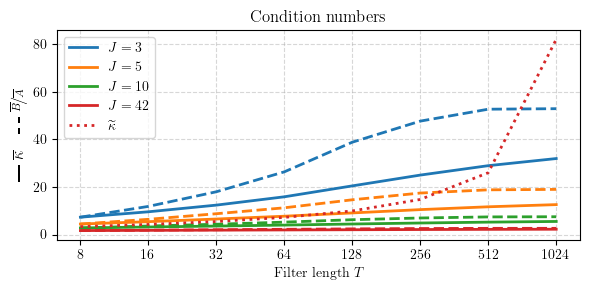

In [71]:
# cond_mean_p = cond_mean[[0,2,6],:].T
# mean_cond_p = mean_cond[[0,2,6],:].T

cond_mean_p = cond_mean.T
mean_cond_p = mean_cond.T

x = np.arange(8)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
labels=['$J=3$','$J=5$','$J=10$','$J=42$']

plt.figure(figsize=(6, 3))
for i in range(4):
    plt.plot(x, cond_mean_p[:,i], linewidth=2, color = colors[i], label = labels[i])
    plt.plot(x, mean_cond_p[:,i], linewidth=2, linestyle='--',color = colors[i])
plt.plot(x, (1+2*np.sqrt(np.log2(T_vals)/42))/(1-2*np.sqrt(np.log2(T_vals)/42)),':',color = 'tab:red',linewidth=2,label = '$\widetilde\kappa$')

plt.xticks(np.arange(len(T_vals)),T_vals);
plt.xlabel('Filter length' '$\ T$')
plt.ylabel(r'$\textbf{\rule[0.5ex]{0.9em}{0.73pt}}\ $'r'$\overline{\kappa}$' r'$\quad \textbf{\rule[0.5ex]{0.3em}{0.73pt}}\ \textbf{\rule[0.5ex]{0.3em}{0.73pt}}$ 'r'$\nicefrac{\overline{B}}{\overline{A}}$' ,fontsize=12)
plt.legend(loc = 'upper left')
plt.title('Condition numbers')
plt.grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('plots/condition_numbers.pdf', bbox_inches='tight')
plt.show()

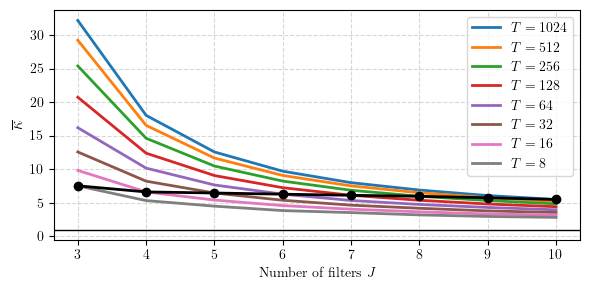

In [55]:
plt.figure(figsize=(6, 3))

x = np.arange(8)

plt.plot(x,np.fliplr(cond_mean), linewidth=2,label=['$T=1024$','$T=512$','$T=256$','$T=128$','$T=64$','$T=32$','$T=16$','$T=8$'])
plt.plot(np.arange(8),np.diag(cond_mean), linewidth=2,color='k', marker='o')
plt.axhline(y=1, color='k',linewidth=1, alpha=1)

plt.xticks(np.arange(8),[3,4,5,6,7,8,9,10]);
plt.xlabel('Number of filters' '$\ J$')
plt.ylabel('$\overline{\kappa}$',fontsize=12)
plt.legend(loc = 'upper right')
plt.grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('plots/condition_numbers_flipped.pdf', bbox_inches='tight')
plt.show()